# Pregunta 2
Se requiere codificar una función que genere una señal de onda cuadrada con un dutty cycle de 50%. Para ello, se sabe que la única información que debe brindarse a la función como argumentos de entrada el número de elementos que representan un periodo, el valor de la amplitud de la onda, el número de elementos total del arreglo resultante y el puntero de salida.
Considerar que la amplitud requiere de precisión simple.

Por tanto, se le pide:

a) (2.0 puntos) El archivo de la función en C



In [110]:
%%file onda_dos.c

void calculo_onda(int elementos_por_periodo, double amplitud, int total_elementos, double *onda_cuadrada)
{
    int mitad_periodo = elementos_por_periodo/2; 
    for (int i = 0; i< total_elementos; i++)
    {
        int posicion_periodo = i % elementos_por_periodo;
        if (posicion_periodo < mitad_periodo)
        {
            onda_cuadrada[i] = amplitud;
        }
        else
        {
            onda_cuadrada[i] = 0;
            //onda_cuadrada[i] = -amplitud;//
        }
    }
}

Overwriting onda_dos.c


b) (2.0 puntos) La función en Python

In [111]:
def onda_cuadrada( elementos_por_periodo,  amplitud,  total_elementos, onda_cuadrada):

    mitad_periodo = elementos_por_periodo/2
    for i in range(total_elementos):
        posicion_periodo = i % elementos_por_periodo
        if (posicion_periodo < mitad_periodo):
          onda_cuadrada[i] = amplitud
        else:
          onda_cuadrada[i] = 0



c) (2.0 punto) Enlace de llamada a la función en C. Este puntaje incluye la asignación adecuada del tipo de datos. Se sugiere que para el valor de elementos del arreglo revise los valores que se generarán en los siguientes incisos

In [112]:
! gcc -c onda_dos.c -o onda_dos.o
! gcc -shared onda_dos.o -o onda_dos.so

In [113]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt
lib = ctypes.CDLL('./onda_dos.so')
lib.calculo_onda.argtypes = [ctypes.c_int, ctypes.c_double, ctypes.c_int, np.ctypeslib.ndpointer(dtype = np.double)]
lib.calculo_onda.restypes = None

salida = np.zeros(128, dtype=np.double)
print(type(salida))

<class 'numpy.ndarray'>


d) (1.0 punto) Generar una gráfica de la onda cuadrada resultante considerando lo siguiente:
Elementos del periodo: 16
Amplitud : 2.5
Elementos total del arreglo: 128

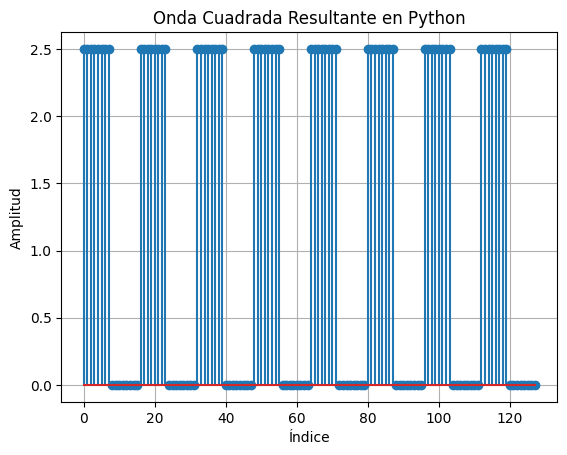

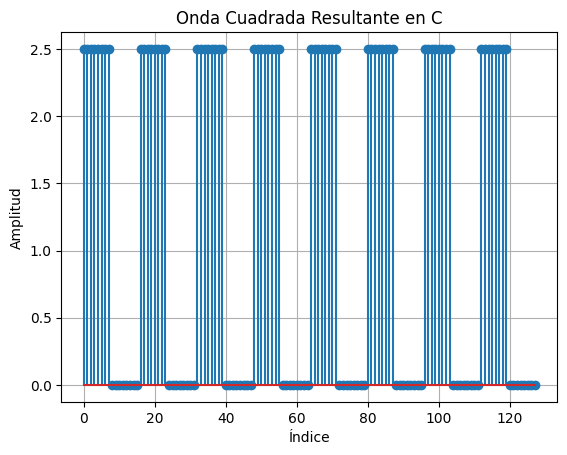

In [114]:
onda_cuadrada(16,2.5,128,salida)
plt.stem(salida)
plt.grid()
plt.title('Onda Cuadrada Resultante en Python')
plt.xlabel('Índice')
plt.ylabel('Amplitud')
plt.show()


lib.calculo_onda(16,2.5,128,salida)
plt.stem(salida)
plt.grid()
plt.title('Onda Cuadrada Resultante en C')
plt.xlabel('Índice')
plt.ylabel('Amplitud')
plt.show()

e) (1.5 puntos) Evaluar el desempeño de su algoritmo para diferentes tamaños del arreglo total:
$$ 2^{9} : 2^{15}$$
Utilice 20 iteraciones por generación y extraiga la mediana como tiempo representativo. Coloque el número de elementos y amplitud que estime conveniente.

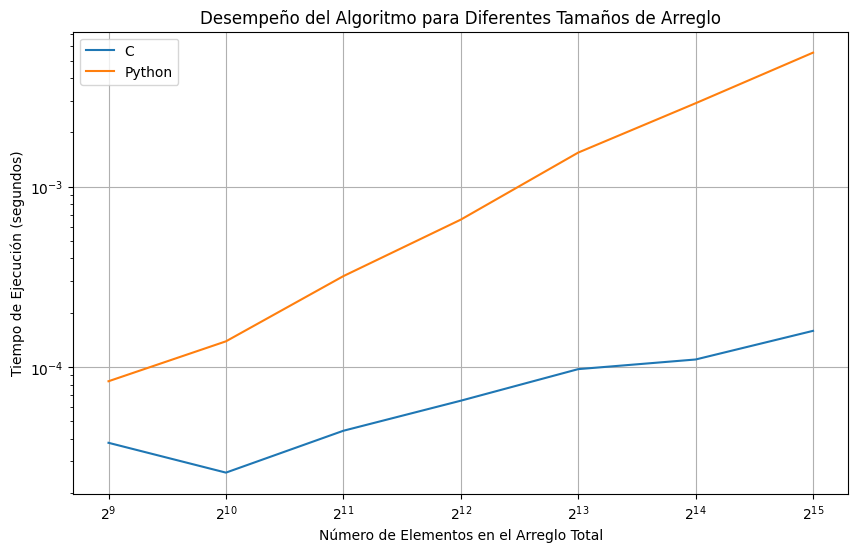

In [115]:
import time
import numpy as np
import matplotlib.pyplot as plt

size = [2**i for i in range(9, 16)]
num_iteraciones = 20
big_c_times = []
big_py_times = []

amplitud = 2.5
elements = 128

for N in size:
    c_times = []
    py_times = []

    for _ in range(num_iteraciones):
        salida = np.zeros(N, dtype=np.double)
        
        c_start_time = time.time()
        lib.calculo_onda(elements, amplitud, N, salida)
        c_end_time = time.time()
        c_times.append(c_end_time - c_start_time)

        py_start_time = time.time()
        onda_cuadrada(elements, amplitud, N, salida)
        py_end_time = time.time()
        py_times.append(py_end_time - py_start_time)

    # Calcular la mediana de los tiempos
    big_c_times.append(np.median(c_times))
    big_py_times.append(np.median(py_times))

plt.figure(figsize=(10, 6))
plt.plot(size, big_c_times, label='C')
plt.plot(size, big_py_times, label='Python')
plt.xscale('log', base=2)
plt.yscale('log')
plt.title('Desempeño del Algoritmo para Diferentes Tamaños de Arreglo')
plt.xlabel('Número de Elementos en el Arreglo Total')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.legend()
plt.grid(True)
plt.show()


f) (0.75 puntos) Hallar el SpeedUP para todo tamaño anteriormente, considerando la función más lenta como referencia.

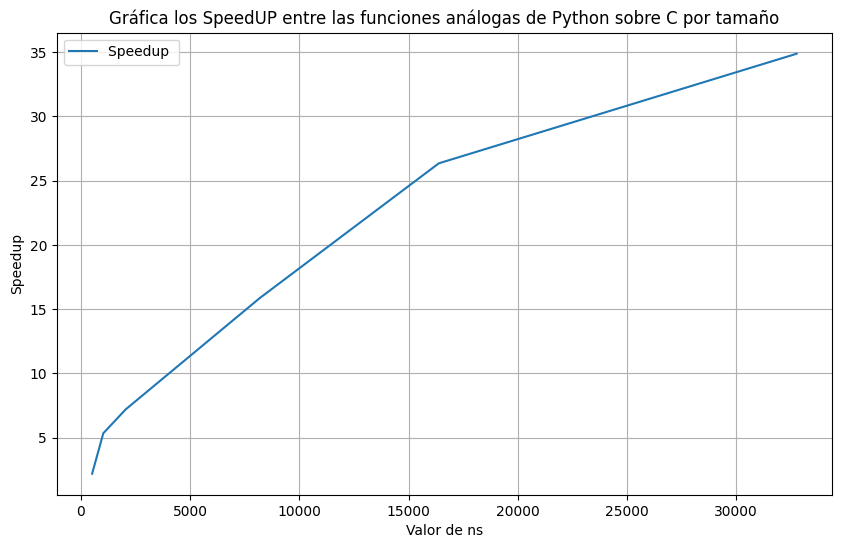

In [116]:
speedup = [big_py_times[i] / big_c_times[i] for i in range(len(size))]

plt.figure(figsize=(10, 6))
plt.plot(size, speedup, label="Speedup ")
plt.xlabel('Valor de ns')
plt.ylabel('Speedup')
plt.title("Gráfica los SpeedUP entre las funciones análogas de Python sobre C por tamaño")
plt.legend()
plt.grid(True)
plt.show()  


g) (0.75 puntos) Comentar el motivo de la diferencia temporal (si es que la hay) entre sus tiempos de ejecución.

Respuesta:

Eficiencia de C frente a Python:

C es conocido por ser un lenguaje de bajo nivel y compilado, lo que generalmente resulta en ejecuciones más rápidas que las de Python, que es un lenguaje de alto nivel e interpretado.
La eficiencia de C se debe en parte a su capacidad para trabajar directamente con la memoria y realizar optimizaciones durante la compilación, lo cual puede conducir a un código máquina altamente eficiente.
Lógica Similar en Ambas Implementaciones:

Las funciones en C y Python son similares en términos de lógica y estructura.
Ambas funciones generan una señal de onda cuadrada con un duty cycle del 50% al asignar valores positivos en la primera mitad del periodo y cero en la segunda mitad.
Posible Inversión de la Onda en C:

La implementación en C incluye una línea comentada que podría invertir la onda cuadrada en la segunda mitad del periodo al asignar valores negativos. Sin embargo, esta parte está comentada en tu código.
Speedup y Diferencias Temporales:

La observación de que "C es más rápido que Python" se respalda mediante la medición de tiempos de ejecución y el cálculo del Speedup.
En general, la diferencia en la ejecución de ambos códigos se debe a la naturaleza compilada y de bajo nivel de C, que tiende a ser más eficiente en términos de rendimiento.
En resumen, ambas implementaciones cumplen su propósito de generar una onda cuadrada con un duty cycle del 50%. La elección entre C y Python dependerá de varios factores, como la naturaleza del proyecto, la facilidad de desarrollo y el rendimiento requerido. En situaciones donde la eficiencia es crítica, C puede ser preferido, pero en contextos donde la legibilidad y el desarrollo rápido son esenciales, Python sigue siendo una opción valiosa.